<a href="https://colab.research.google.com/github/sougatadutta0199/covid19visualizer/blob/main/Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
plt.style.use('fivethirtyeight')

df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv', parse_dates=['Date'])
df['Total Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)

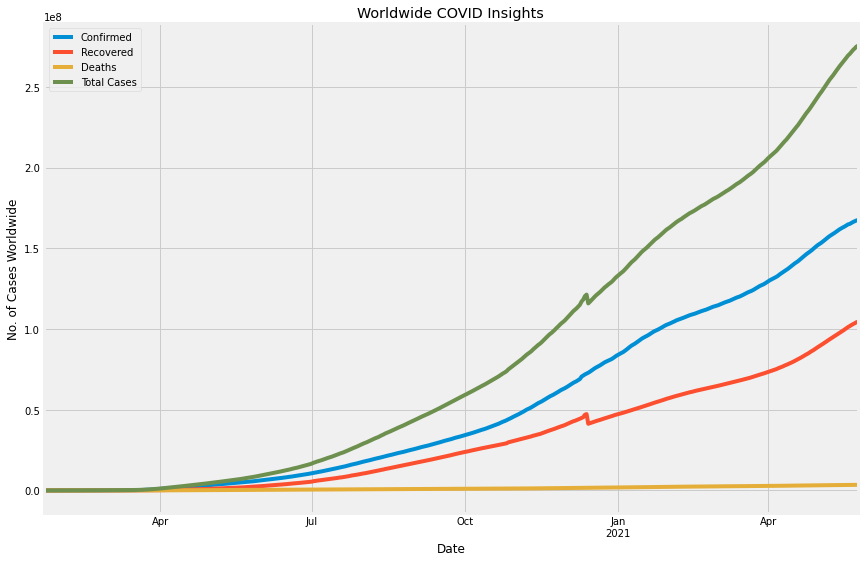

In [ ]:
# worldwide cases

worldwide_df = df.groupby(['Date']).sum()
w = worldwide_df.plot(figsize=(13,9))
w.set_xlabel('Date')
w.set_ylabel('No. of Cases Worldwide')
w.title.set_text('Worldwide COVID Insights')

plt.show()

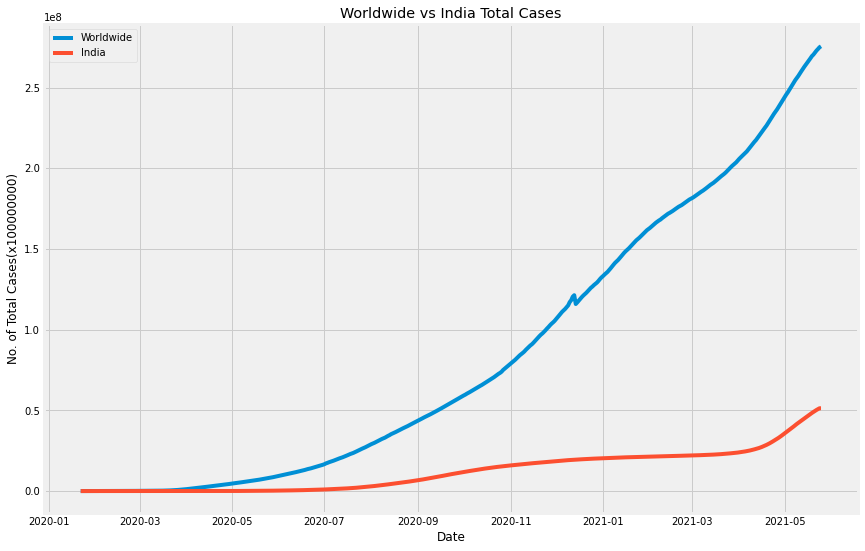

In [ ]:
in_df = df[df['Country']=='India'].groupby(['Date']).sum()

fig = plt.figure(figsize=(13,9))
ax = fig.add_subplot(111)

ax.plot(worldwide_df[['Total Cases']], label='Worldwide')
ax.plot(in_df[['Total Cases']], label='India')
ax.set_xlabel('Date')
ax.set_ylabel('No. of Total Cases(x100000000)')
ax.title.set_text('Worldwide vs India Total Cases')

plt.legend(loc="upper left")
plt.show()

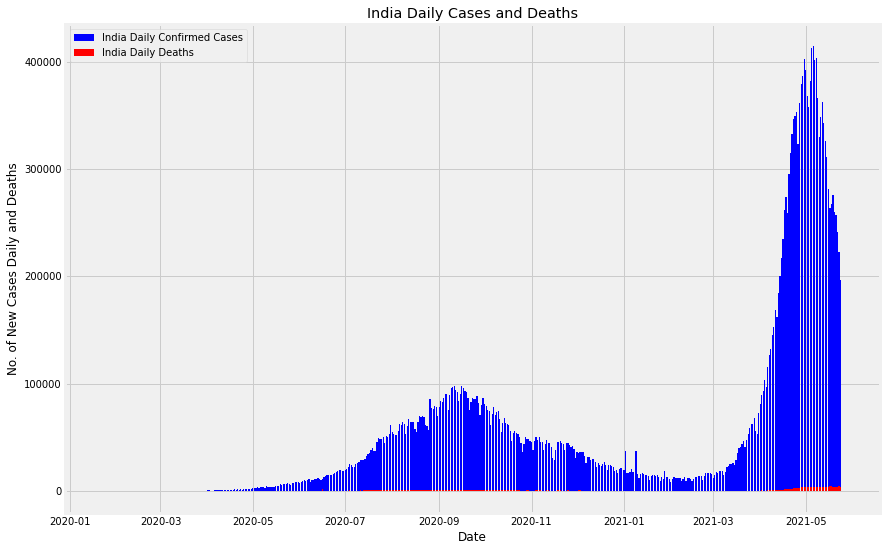

In [ ]:
# India daily cases and deaths
in_df = in_df.reset_index()
in_df['Daily Confirmed'] = in_df['Confirmed'].sub(in_df['Confirmed'].shift())
in_df['Daily Deaths'] = in_df['Deaths'].sub(in_df['Deaths'].shift())

fig = plt.figure(figsize=(13,9))
ax = fig.add_subplot(111)

ax.bar(in_df['Date'],in_df['Daily Confirmed'], color ='b', label='India Daily Confirmed Cases')
ax.bar(in_df['Date'],in_df['Daily Deaths'], color ='r', label='India Daily Deaths')
ax.set_xlabel('Date')
ax.set_ylabel('No. of New Cases Daily and Deaths')
ax.title.set_text('India Daily Cases and Deaths')

plt.legend(loc='upper left')
plt.show()

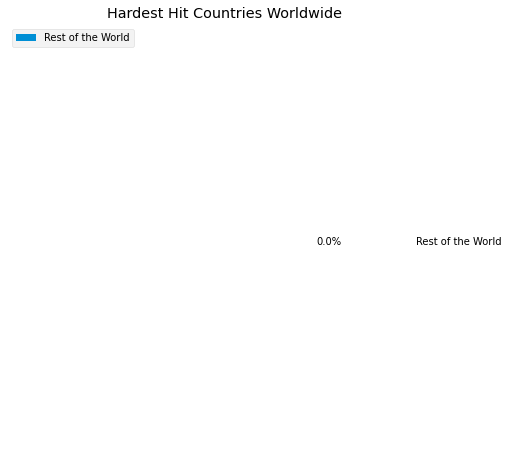

In [ ]:
from datetime import date, timedelta
yesterday = date.today() - timedelta(days=1)
yesterday.strftime('%Y-%m-%d')

today_df = df[df['Date']==yesterday]
top_10 = today_df.sort_values(['Confirmed'], ascending=False)[:10]
top_10.loc['rest-of-world'] = today_df.sort_values(['Confirmed'], ascending=False)[10:].sum()
top_10.loc['rest-of-world', 'Country'] = "Rest of the World"

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.pie(top_10['Confirmed'], labels=top_10['Country'], autopct='%1.1f%%')
ax.title.set_text('Hardest Hit Countries Worldwide')

plt.legend(loc='upper left')
plt.show()